# Étape 1 : recuperation des données

In [2]:


# Lire les données (avec suppression des espaces inutiles autour des valeurs)
myData <- read.table("adult.csv", sep = ",", header = TRUE, stringsAsFactors = FALSE, strip.white = TRUE)



## supression de toute les lignes ayant un ? dedans

In [3]:
# Nombre de lignes avant nettoyage
initial_rows <- nrow(myData)

# Supprimer les lignes contenant au moins un "?"
rows_with_question <- apply(myData, 1, function(row) any(trimws(row) == "?"))
myData <- myData[!rows_with_question, ]

# Nombre de lignes après nettoyage
cleaned_rows <- nrow(myData)

# Résumé
cat(" Lignes initiales :", initial_rows, "\n")
cat(" Lignes supprimées car contenant un ou plusieurs ? :", initial_rows - cleaned_rows, "\n")
cat(" Lignes restantes :", cleaned_rows, "\n")



 Lignes initiales : 32561 
 Lignes supprimées car contenant un ou plusieurs ? : 2399 
 Lignes restantes : 30162 


Affichage des collones du fichier

In [3]:
#affichage de tous les noms de colonnes
colnames(myData)

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education.num"  "marital.status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital.gain"   "capital.loss"  
[13] "hours.per.week" "native.country" "income"

Affichage d'un resumer des datas

In [5]:
summary(myData)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:30162       Min.   :  13769   Length:30162      
 1st Qu.:28.00   Class :character   1st Qu.: 117627   Class :character  
 Median :37.00   Mode  :character   Median : 178425   Mode  :character  
 Mean   :38.44                      Mean   : 189794                     
 3rd Qu.:47.00                      3rd Qu.: 237629                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:30162       Length:30162       Length:30162      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.12                                                           
 3rd Qu.:13.00                                                           
 Max.   :16.00                               

# Etape 2: Choix des attribues qualitatifs ayant un impact sur le revenu
###  for sure :Work class / education / occupation / specialty
### to check: native country  / race / sex

### setup des marges et de la police pour des graphiques plus lisibles

In [6]:

#par(mar = c(6, 6, 6, 6),cex.names = 0.01) # Ajuste les marges de la fenêtre graphique et la taille de police des champs
par(mar = c(8, 8, 6, 6),  cex.axis = 0.1)  # Augmenter les marges et ajuster la taille de la police


## workclass

                  income
workclass          <=50K  >50K
  Federal-gov        578   365
  Local-gov         1458   609
  Private          17410  4876
  Self-emp-inc       474   600
  Self-emp-not-inc  1785   714
  State-gov          935   344
  Without-pay         14     0

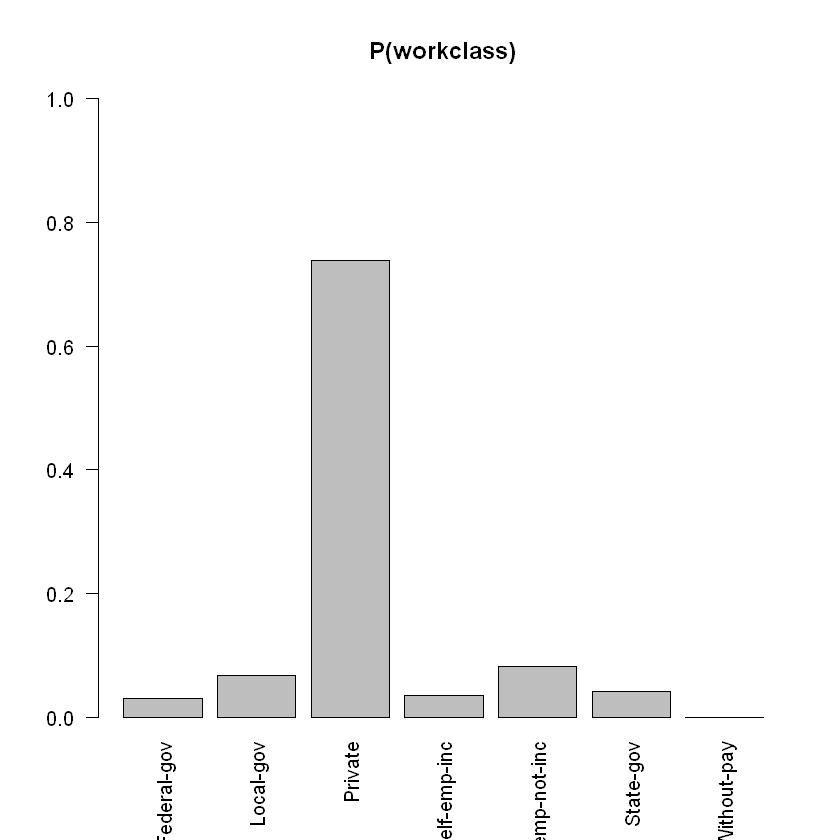

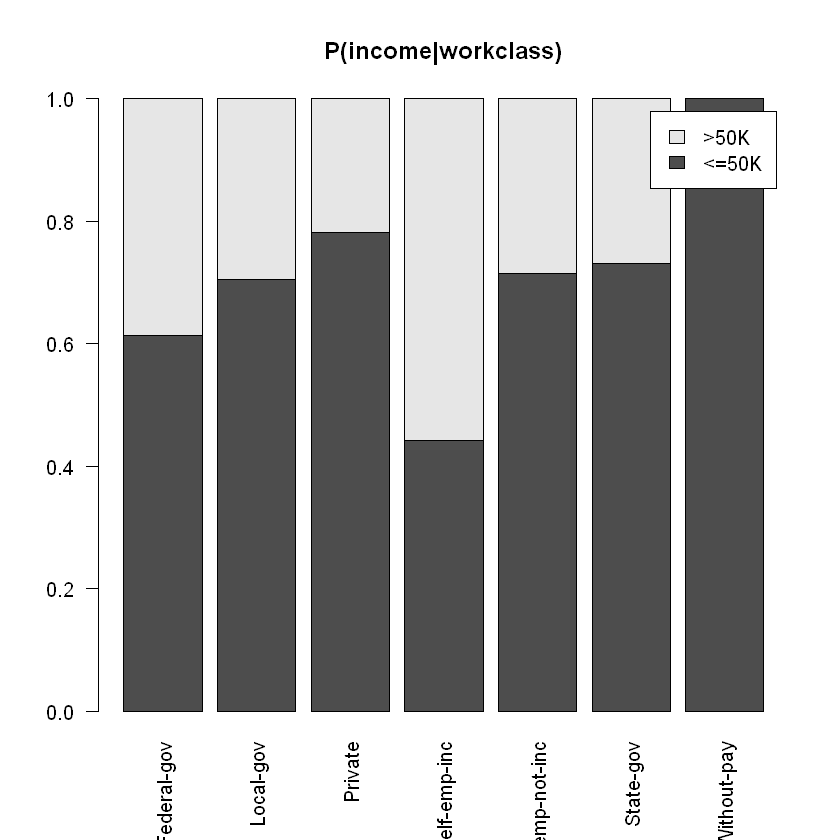

In [7]:

table(myData[, c(2, 15)])


barplot(prop.table(table(myData[, c(2)])), main = "P(workclass)", legend = F, beside = FALSE,  las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(2, 15)]), 1)), main = "P(income|workclass)", legend = TRUE, beside = FALSE, las = 2)


## Education

              income
education      <=50K >50K
  10th           761   59
  11th           989   59
  12th           348   29
  1st-4th        145    6
  5th-6th        276   12
  7th-8th        522   35
  9th            430   25
  Assoc-acdm     752  256
  Assoc-voc      963  344
  Bachelors     2918 2126
  Doctorate       95  280
  HS-grad       8223 1617
  Masters        709  918
  Preschool       45    0
  Prof-school    136  406
  Some-college  5342 1336

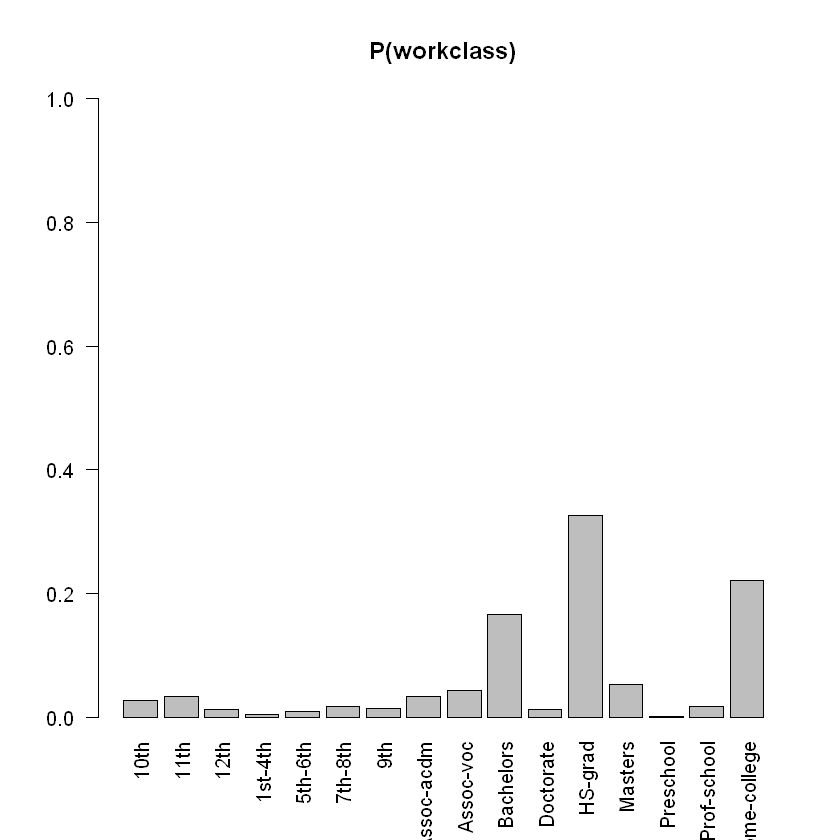

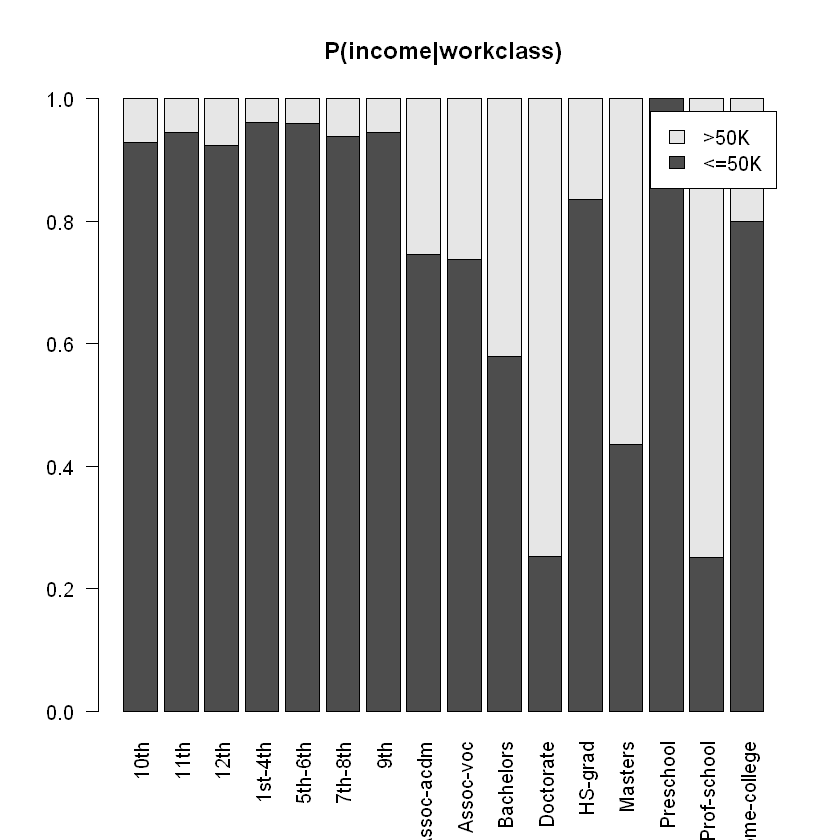

In [8]:
table(myData[, c(4, 15)])


barplot(prop.table(table(myData[, c(4)])), main = "P(workclass)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(4, 15)]), 1)), main = "P(income|workclass)", legend = TRUE, beside = FALSE,  las = 2)


## Occupation

                   income
occupation          <=50K >50K
  Adm-clerical       3223  498
  Armed-Forces          8    1
  Craft-repair       3122  908
  Exec-managerial    2055 1937
  Farming-fishing     874  115
  Handlers-cleaners  1267   83
  Machine-op-inspct  1721  245
  Other-service      3080  132
  Priv-house-serv     142    1
  Prof-specialty     2227 1811
  Protective-serv     434  210
  Sales              2614  970
  Tech-support        634  278
  Transport-moving   1253  319


     Adm-clerical      Armed-Forces      Craft-repair   Exec-managerial 
     0.1233671507      0.0002983887      0.1336118295      0.1323519660 
  Farming-fishing Handlers-cleaners Machine-op-inspct     Other-service 
     0.0327896028      0.0447583052      0.0651813540      0.1064916120 
  Priv-house-serv    Prof-specialty   Protective-serv             Sales 
     0.0047410649      0.1338770639      0.0213513693      0.1188250116 
     Tech-support  Transport-moving 
     0.0302367217      0.0521185598 

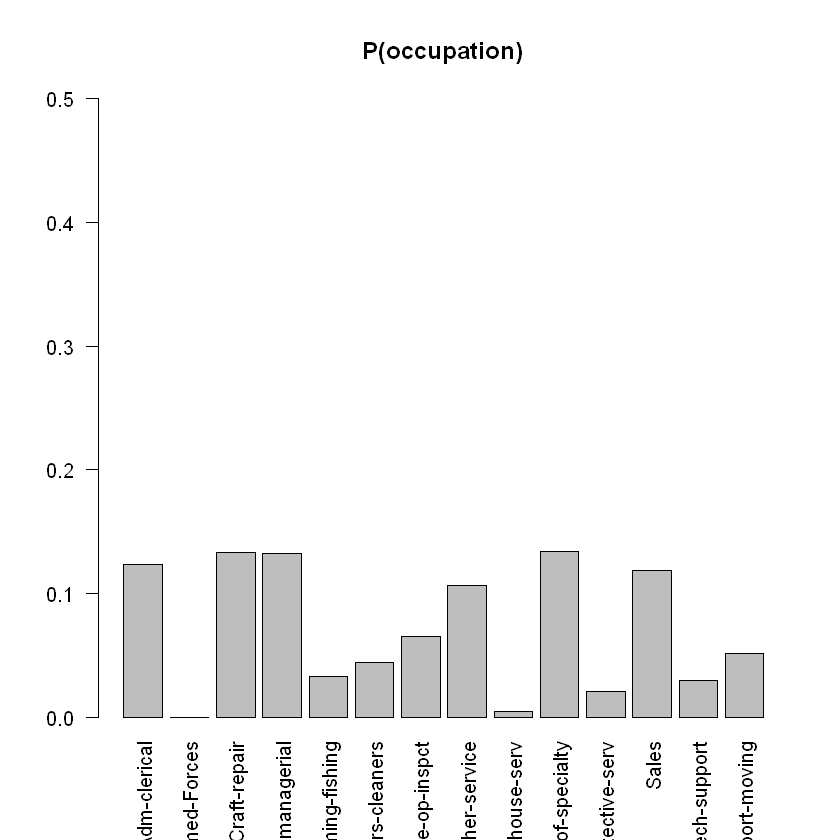

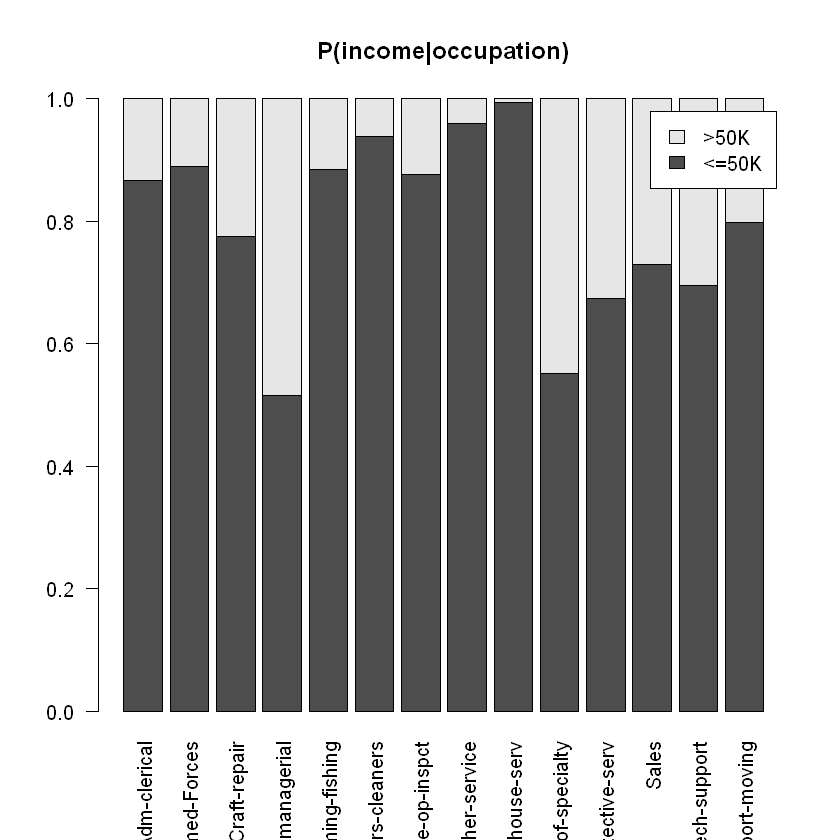

In [8]:
table(myData[, c(7, 15)])
prop.table(table(myData[, c(7)]))


barplot(prop.table(table(myData[, c(7)])), main = "P(occupation)", legend = F, beside = FALSE, las = 2,ylim = c(0,0.5))
barplot(t(prop.table(table(myData[, c(7, 15)]), 1)), main = "P(income|occupation)", legend = TRUE, beside = FALSE,  las = 2)


## Native country

                            income
native.country               <=50K  >50K
  Cambodia                      11     7
  Canada                        71    36
  China                         48    20
  Columbia                      54     2
  Cuba                          67    25
  Dominican-Republic            65     2
  Ecuador                       23     4
  El-Salvador                   91     9
  England                       56    30
  France                        15    12
  Germany                       84    44
  Greece                        21     8
  Guatemala                     60     3
  Haiti                         38     4
  Holand-Netherlands             1     0
  Honduras                      11     1
  Hong                          13     6
  Hungary                       10     3
  India                         60    40
  Iran                          24    18
  Ireland                       19     5
  Italy                         44    24
  Jamaica             


                  Cambodia                     Canada 
              0.0005967774               0.0035475101 
                     China                   Columbia 
              0.0022544924               0.0018566408 
                      Cuba         Dominican-Republic 
              0.0030501956               0.0022213381 
                   Ecuador                El-Salvador 
              0.0008951661               0.0033154300 
                   England                     France 
              0.0028512698               0.0008951661 
                   Germany                     Greece 
              0.0042437504               0.0009614747 
                 Guatemala                      Haiti 
              0.0020887209               0.0013924806 
        Holand-Netherlands                   Honduras 
              0.0000331543               0.0003978516 
                      Hong                    Hungary 
              0.0006299317               0.0004310059 
         

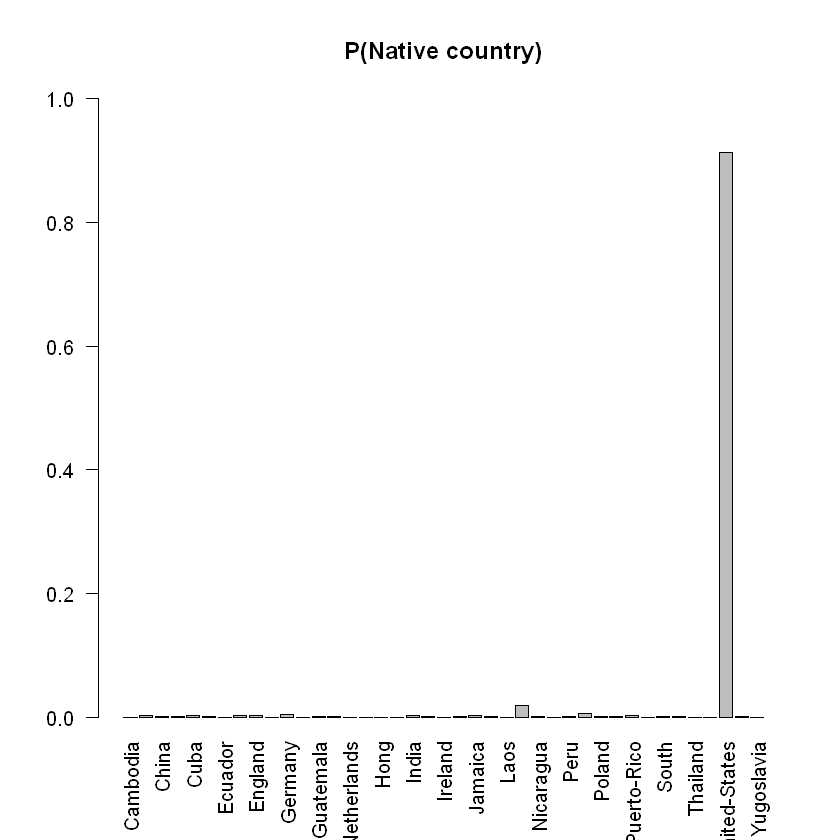

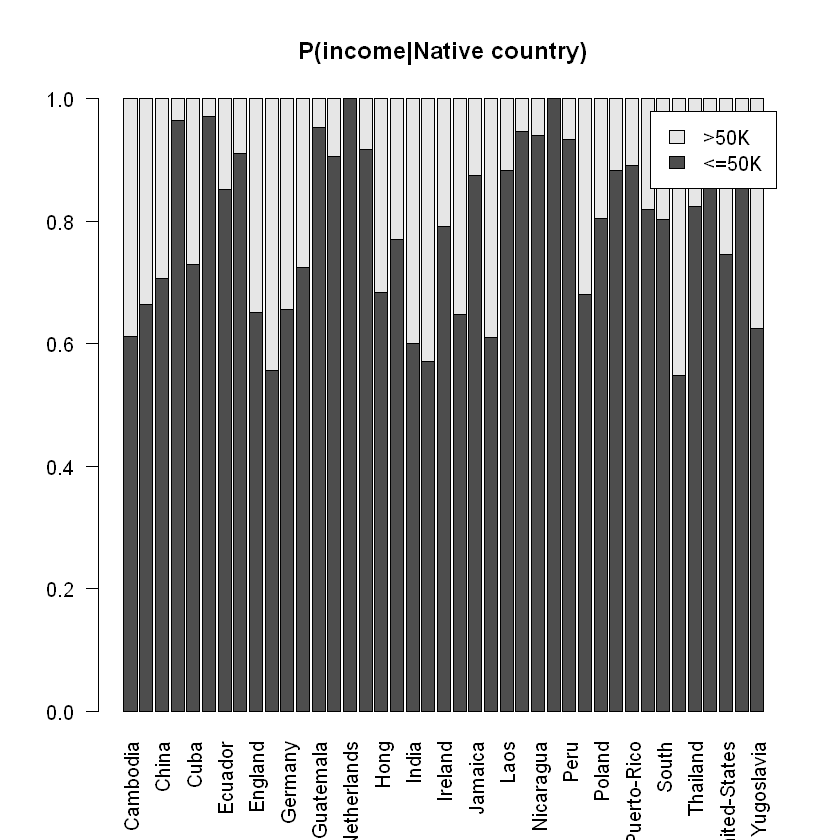

In [9]:
table(myData[, c(14, 15)])
prop.table(table(myData[, c(14)]))


barplot(prop.table(table(myData[, c(14)])), main = "P(Native country)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(14, 15)]), 1)), main = "P(income|Native country)", legend = TRUE, beside = FALSE,  las = 2)


## Marital status

                       income
marital.status          <=50K >50K
  Divorced               3762  452
  Married-AF-spouse        11   10
  Married-civ-spouse     7666 6399
  Married-spouse-absent   339   31
  Never-married          9256  470
  Separated               873   66
  Widowed                 747   80


             Divorced     Married-AF-spouse    Married-civ-spouse 
         0.1397122207          0.0006962403          0.4663152311 
Married-spouse-absent         Never-married             Separated 
         0.0122670910          0.3224587229          0.0311318878 
              Widowed 
         0.0274186062 

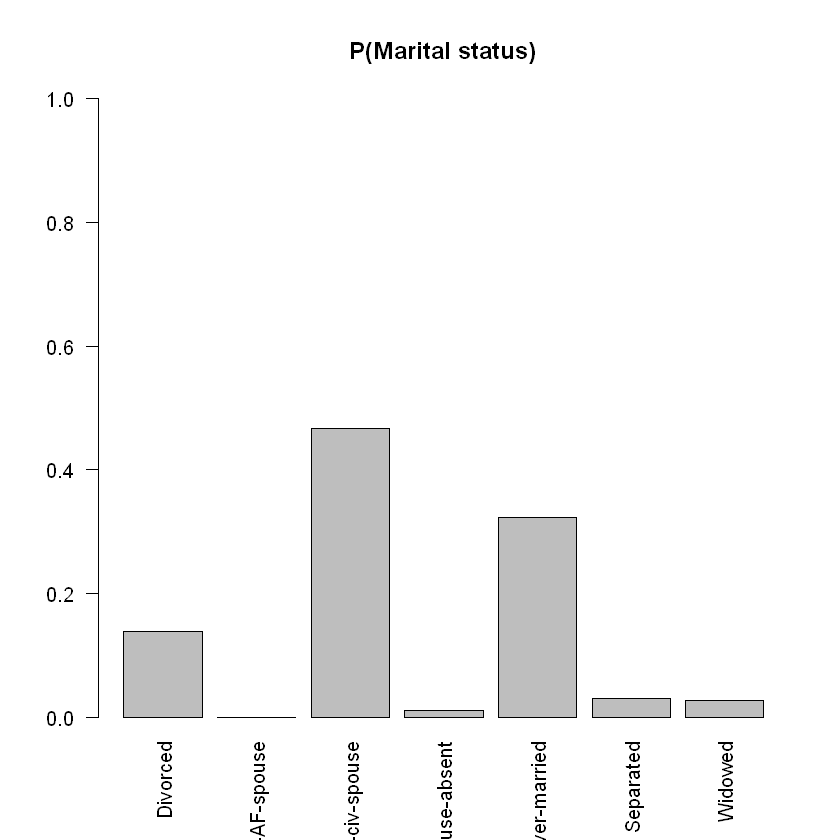

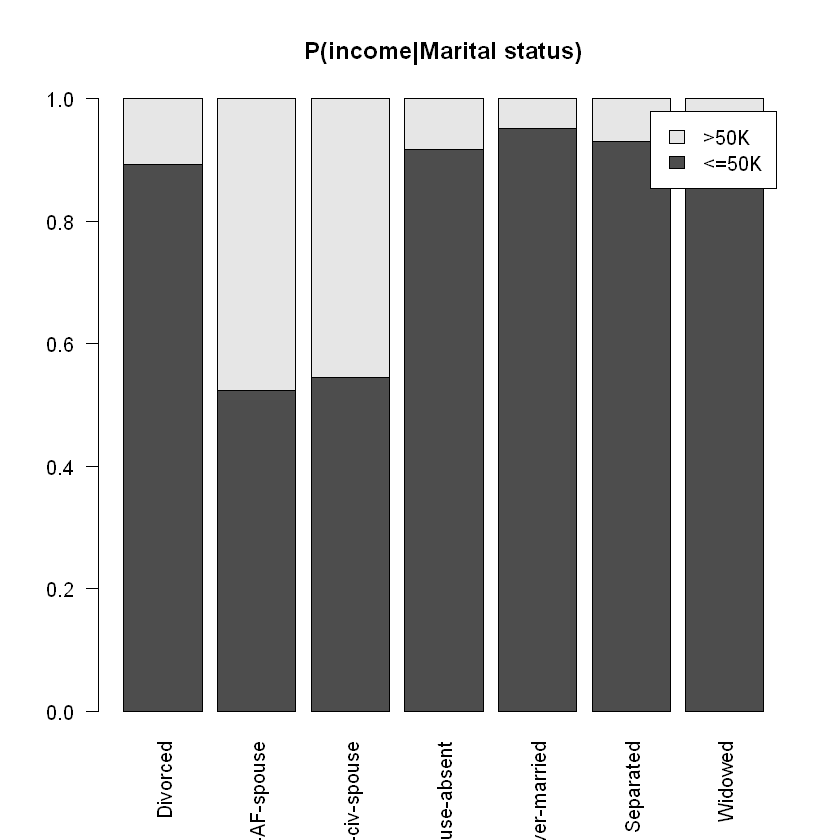

In [10]:
table(myData[, c(6, 15)])
prop.table(table(myData[, c(6)]))


barplot(prop.table(table(myData[, c(6)])), main = "P(Marital status)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(6, 15)]), 1)), main = "P(income|Marital status)", legend = TRUE, beside = FALSE,  las = 2)


## Relashionship

                income
relationship     <=50K >50K
  Husband         6784 5679
  Not-in-family   6903  823
  Other-relative   854   35
  Own-child       4402   64
  Unmarried       2999  213
  Wife             712  694


       Husband  Not-in-family Other-relative      Own-child      Unmarried 
    0.41320204     0.25615012     0.02947417     0.14806710     0.10649161 
          Wife 
    0.04661495 

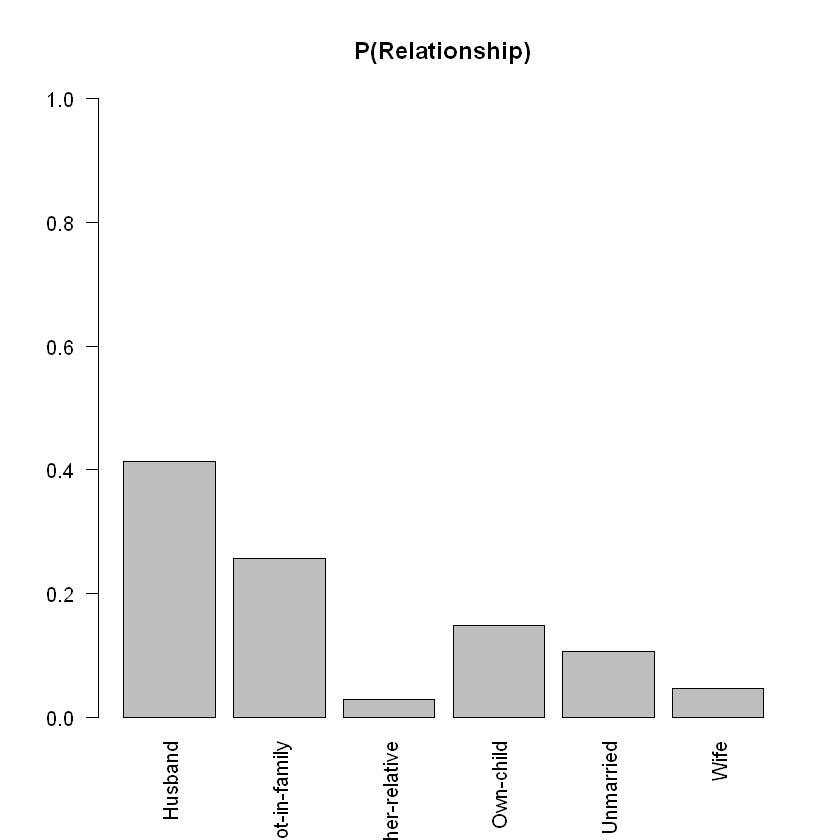

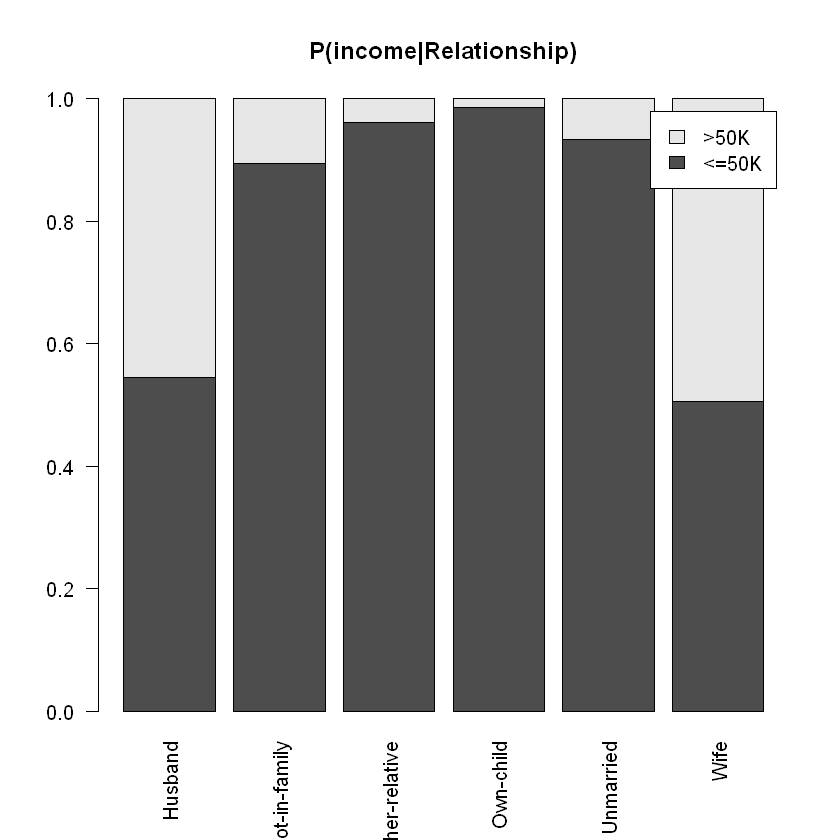

In [11]:
table(myData[, c(8, 15)])
prop.table(table(myData[, c(8)]))


barplot(prop.table(table(myData[, c(8)])), main = "P(Relationship)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(8, 15)]), 1)), main = "P(income|Relationship)", legend = TRUE, beside = FALSE,  las = 2)


## Race

                    income
race                 <=50K  >50K
  Amer-Indian-Eskimo   252    34
  Asian-Pac-Islander   647   248
  Black               2451   366
  Other                210    21
  White              19094  6839


Amer-Indian-Eskimo Asian-Pac-Islander              Black              Other 
       0.009482130        0.029673099        0.093395663        0.007658643 
             White 
       0.859790465 

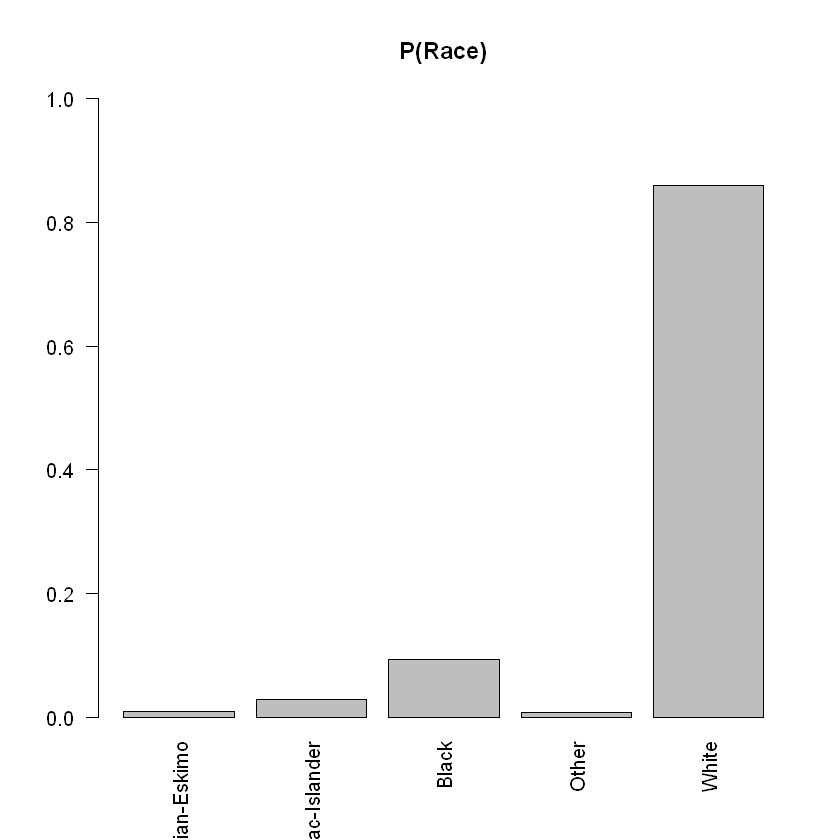

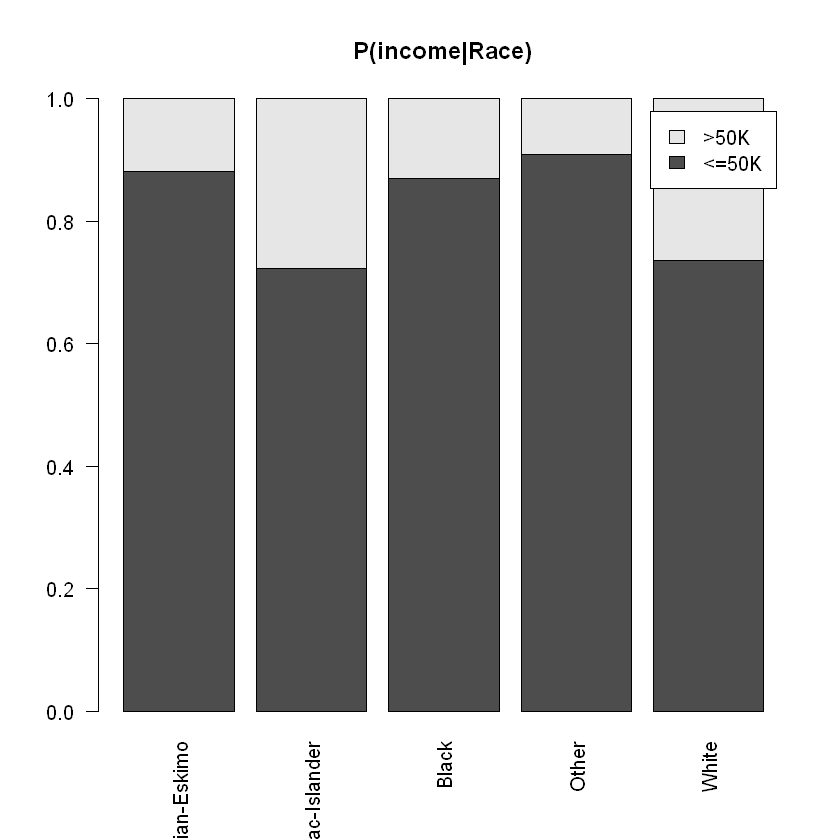

In [12]:
table(myData[, c(9, 15)])
prop.table(table(myData[, c(9)]))


barplot(prop.table(table(myData[, c(9)])), main = "P(Race)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(9, 15)]), 1)), main = "P(income|Race)", legend = TRUE, beside = FALSE,  las = 2)


# QualitativeAttrsTheory 

In [9]:
# Distribution conjointe P(f, y)
joint_dist <- prop.table(table(myData[, 7], myData[, 15]))

# Afficher la table
print(joint_dist)


                   
                           <=50K         >50K
  Adm-clerical      0.1068563093 0.0165108415
  Armed-Forces      0.0002652344 0.0000331543
  Craft-repair      0.1035077250 0.0301041045
  Exec-managerial   0.0681320867 0.0642198793
  Farming-fishing   0.0289768583 0.0038127445
  Handlers-cleaners 0.0420064982 0.0027518069
  Machine-op-inspct 0.0570585505 0.0081228035
  Other-service     0.1021152443 0.0043763676
  Priv-house-serv   0.0047079106 0.0000331543
  Prof-specialty    0.0738346264 0.0600424375
  Protective-serv   0.0143889662 0.0069624030
  Sales             0.0866653405 0.0321596711
  Tech-support      0.0210198263 0.0092168954
  Transport-moving  0.0415423380 0.0105762217


In [10]:

# Marginale P(y) : somme sur les colonnes
marginal_y <- colSums(joint_dist)

# Marginale P(f) : somme sur les lignes
marginal_f <- rowSums(joint_dist)

# Affichage
print("--- P(f) ---")
print(marginal_f)

print("--- P(y) ---")
print(marginal_y)
# Calcul de P(f | y)
cond_f_given_y <- sweep(joint_dist, 2, marginal_y, FUN = "/")
print("--- P(f | y) ---")
print(cond_f_given_y)
print("Verification")
print(colSums(cond_f_given_y)) # Vérification de la somme des colonnes
# Calcul de P(y | f)
cond_y_given_f <- sweep(joint_dist, 1, marginal_f, FUN = "/")
print("--- P(y | f) ---")
print(cond_y_given_f)

print("Verification")
print(rowSums(cond_y_given_f)) # Vérification de la somme des colonnes


[1] "--- P(f) ---"
     Adm-clerical      Armed-Forces      Craft-repair   Exec-managerial 
     0.1233671507      0.0002983887      0.1336118295      0.1323519660 
  Farming-fishing Handlers-cleaners Machine-op-inspct     Other-service 
     0.0327896028      0.0447583052      0.0651813540      0.1064916120 
  Priv-house-serv    Prof-specialty   Protective-serv             Sales 
     0.0047410649      0.1338770639      0.0213513693      0.1188250116 
     Tech-support  Transport-moving 
     0.0302367217      0.0521185598 
[1] "--- P(y) ---"
    <=50K      >50K 
0.7510775 0.2489225 
[1] "--- P(f | y) ---"
                   
                           <=50K         >50K
  Adm-clerical      0.1422706807 0.0663292488
  Armed-Forces      0.0003531385 0.0001331913
  Craft-repair      0.1378123069 0.1209376665
  Exec-managerial   0.0907124570 0.2579914758
  Farming-fishing   0.0385803832 0.0153169952
  Handlers-cleaners 0.0559283129 0.0110548748
  Machine-op-inspct 0.0759689238 0.03263185